In [1]:
# Built-in modules
import os
import json
import datetime as dt
from typing import Tuple, List

# Basics of Python data handling and visualization
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm.auto import tqdm

# Module for GeoDB
from xcube_geodb.core.geodb import GeoDBClient

# Imports from eo-learn and sentinelhub-py
from sentinelhub import CRS, BBox, SHConfig, DataCollection

from eolearn.core import (FeatureType,
                          EOPatch, 
                          EOTask, 
                          LinearWorkflow, 
                          EOExecutor, 
                          LoadTask,
                          SaveTask)
from eolearn.io import GeoDBVectorImportTask, SentinelHubInputTask
from eolearn.geometry import VectorToRaster

# Visualisation utilities from utils.py
import sys
sys.path.append('./ai4eo/')
from ai4eo.utils import get_extent, md5_encode_files

In [2]:
%matplotlib inline

/work/ka1176/caroline/miniconda3/envs/kernel-edc-gpu-mistral/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
scl_dict =  {
    0: [0, 0, 0],  # no data
    1: [1, 0, 0.016],  # saturated / defected
    2: [0.525, 0.525, 0.525],  # dark area pixels
    3: [0.467, 0.298, 0.043],  # cloud shadows
    4: [0.063, 0.827, 0.176],  # vegetation
    5: [1, 1, 0.325],  # bare soils
    6: [0, 0, 1],  # water
    7: [0.506, 0.506, 0.506],  # clouds low probability / unclassified 
    8: [0.753, 0.753, 0.753],  # clouds medium probability
    9: [0.949, 0.949, 0.949],  # clouds high probability
    10: [0.733, 0.773, 0.925],  # cirrus
    11: [0.325, 1, 0.980]  # ice / snow
}

In [5]:
submission_path = '/work/ka1176/caroline/gitlab/ai4eo-challenge/ai4eo/submission2/'

In [6]:
from PIL import Image

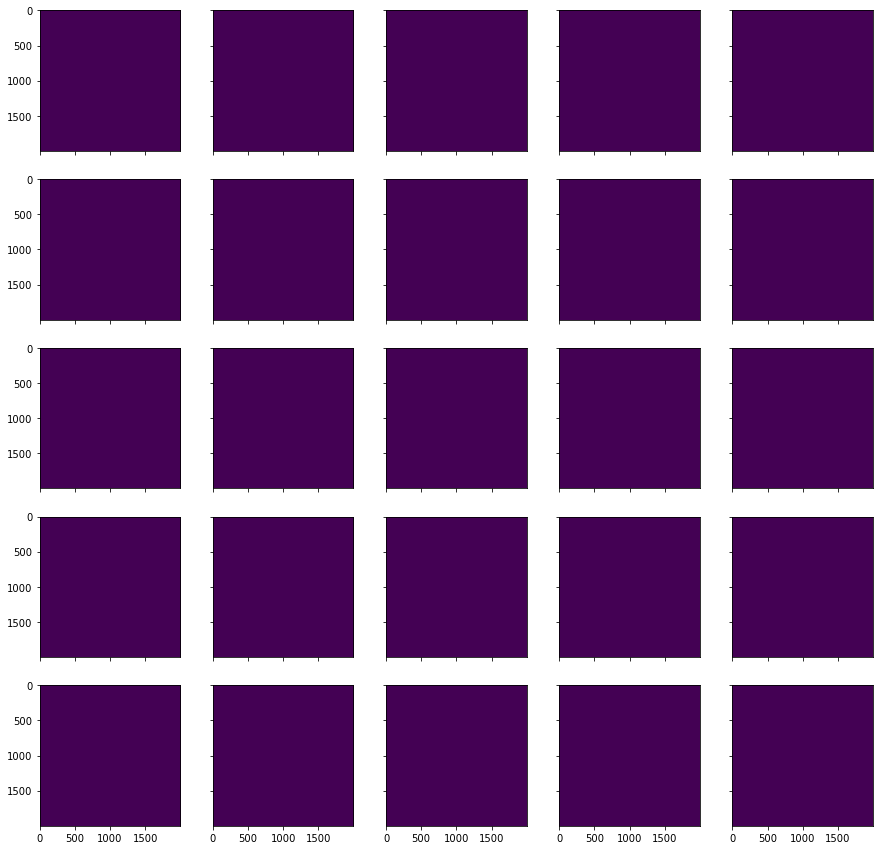

In [11]:
fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=[15, 15])
ax = ax.flatten()

for i,sm in enumerate(np.sort(os.listdir(submission_path))):
    img = Image.open(os.path.join(submission_path, sm))
    x = np.array(img)
    ax[i].imshow(x)


In [12]:
i = np.random.randint(25)
print(i)
i = 12

5


In [16]:
path = "/work/ka1176/shared_data/2021-ai4eo/eopatches/test/"
eopatch = EOPatch.load(os.path.join(path, f'eopatch-{i:02d}'))
img = Image.open(os.path.join(submission_path, f'eopatch-{i:02d}.tif'))
x_img = np.array(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


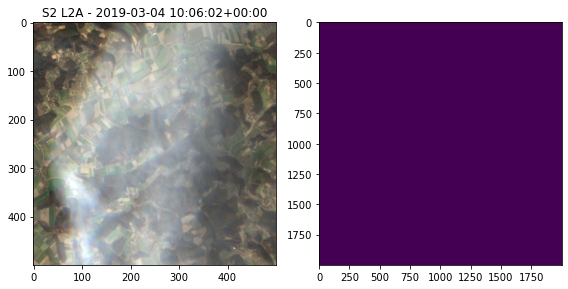

In [17]:
# choose one time index from [0..37] to visualise
tidx = 0

vis_factor = 3.5

norm_factor = eopatch.scalar['NORM_FACTORS'][tidx]

fig, axs = plt.subplots(figsize=(8, 4), ncols=2)

axs[0].imshow(vis_factor * norm_factor * eopatch.data['BANDS'][tidx][..., [3, 2, 1]])
axs[0].set_title(f'S2 L2A - {eopatch.timestamp[tidx]}')

axs[1].imshow(x_img)

fig.tight_layout()

In [15]:
x_img

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)